In [535]:
import os
import pickle
import joblib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sn
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from matplotlib.cm import rainbow
import joblib
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold



In [536]:
dataset = pd.read_csv('HealthData.csv')
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [537]:
#Here i use Label encoder because column name 'thal' not correctly encoded
label_encoder = LabelEncoder()
dataset['thal'] = label_encoder.fit_transform(dataset['thal'])
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,1,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,2,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,0,0


In [538]:
dataset['oldpeak'].value_counts()

oldpeak
0.0    99
1.2    17
0.6    14
1.0    14
1.4    13
0.8    13
0.2    12
1.6    11
1.8    10
2.0     9
0.4     9
0.1     7
2.8     6
2.6     6
1.9     5
0.5     5
3.0     5
1.5     5
3.6     4
2.2     4
3.4     3
0.9     3
2.4     3
0.3     3
4.0     3
1.1     2
4.2     2
2.3     2
2.5     2
3.2     2
5.6     1
2.9     1
6.2     1
2.1     1
1.3     1
3.1     1
3.8     1
0.7     1
3.5     1
4.4     1
Name: count, dtype: int64

In [539]:
!pip freeze

aiofiles==23.2.1
aiohttp==3.9.0
aiosignal==1.3.1
aiostream==0.5.2
altair==5.2.0
annotated-types==0.6.0
anyio==3.7.1
appdirs==1.4.3
apturl==0.5.2
asgiref==3.7.2
asttokens==2.4.1
async-timeout==4.0.3
attrs==23.1.0
backcall==0.2.0
backoff==2.2.1
backports.zoneinfo==0.2.1
bcrypt==4.1.1
beautifulsoup4==4.12.2
blinker==1.7.0
Brlapi==0.7.0
cachetools==5.3.2
certifi==2023.11.17
chardet==5.2.0
charset-normalizer==3.3.2
chroma-hnswlib==0.7.3
chromadb==0.4.18
click==8.1.7
colorama==0.4.6
coloredlogs==15.0.1
comm==0.2.0
command-not-found==0.3
contourpy==1.1.1
cryptography==2.8
cupshelpers==1.0
cycler==0.12.1
dataclasses-json==0.6.2
dbus-python==1.2.16
debugpy==1.8.0
decorator==5.1.1
defer==1.0.6
Deprecated==1.2.14
distlib==0.3.7
distro==1.8.0
distro-info==0.23+ubuntu1.1
dnspython==2.4.2
duplicity==0.8.12.0
emoji==2.8.0
entrypoints==0.3
exceptiongroup==1.2.0
executing==2.0.1
fastapi==0.104.1
fasteners==0.14.1
ffmpy==0.3.1
filelock==3.13.1
filetype==1.2.0
flatbuffers==23.5.26
fonttools==4.46.0
froze

In [540]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      303 non-null    int64  
 13  num       303 non-null    int64  
dtypes: float64(2), int64(12)
memory usage: 33.3 KB


In [541]:
dataset.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        0
num         0
dtype: int64

In [542]:
dataset['thal'].unique()


array([1, 0, 2, 3])

In [543]:
dataset.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        0
num         0
dtype: int64

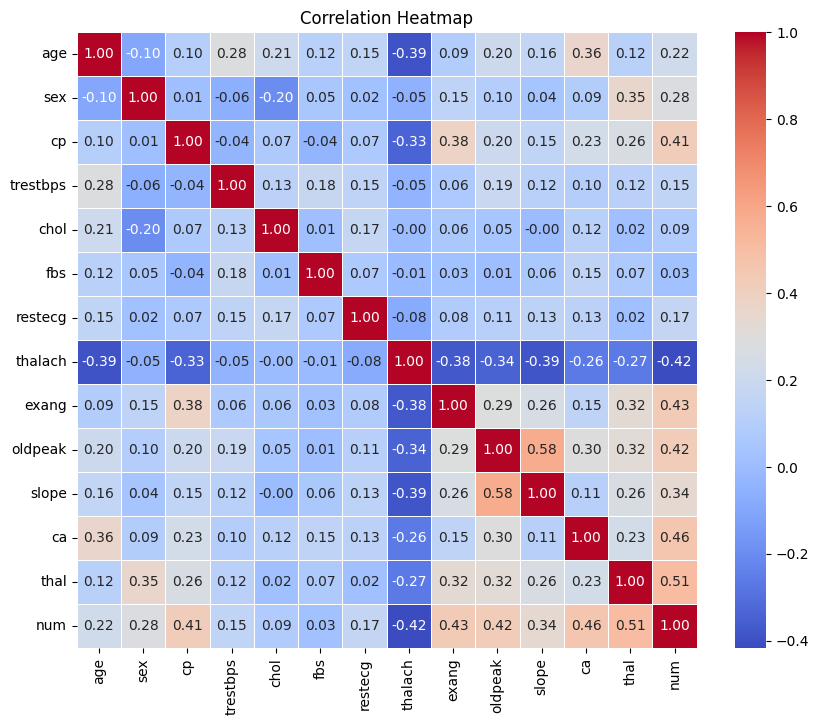

In [544]:
correlation_matrix = dataset.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap using Seaborn
sn.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [545]:
# pd.crosstab(dataset.sex,dataset.age).plot(kind='scatter')

<!-- trestbps,chol,fbs,oldpeak, -->

[Text(0.5, 1.0, 'Box Plot of Health data')]

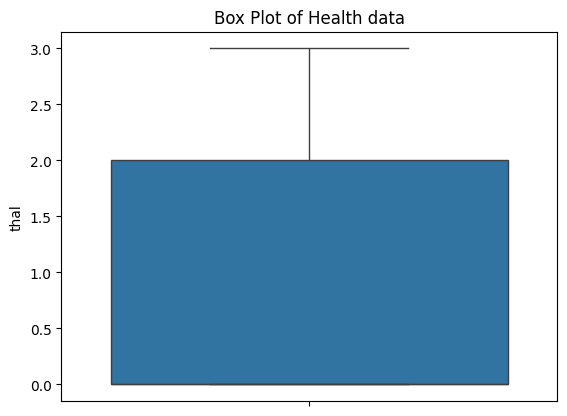

In [546]:
sn.boxplot(data=dataset['thal']).set(title="Box Plot of Health data")

In [547]:
columns = ['trestbps', 'chol','oldpeak','ca','thalach']

for col in columns:
    Q1 = dataset[col].quantile(0.25)
    Q3 = dataset[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    dataset = dataset[(dataset[col] >= lower_bound) & (dataset[col] <= upper_bound)]

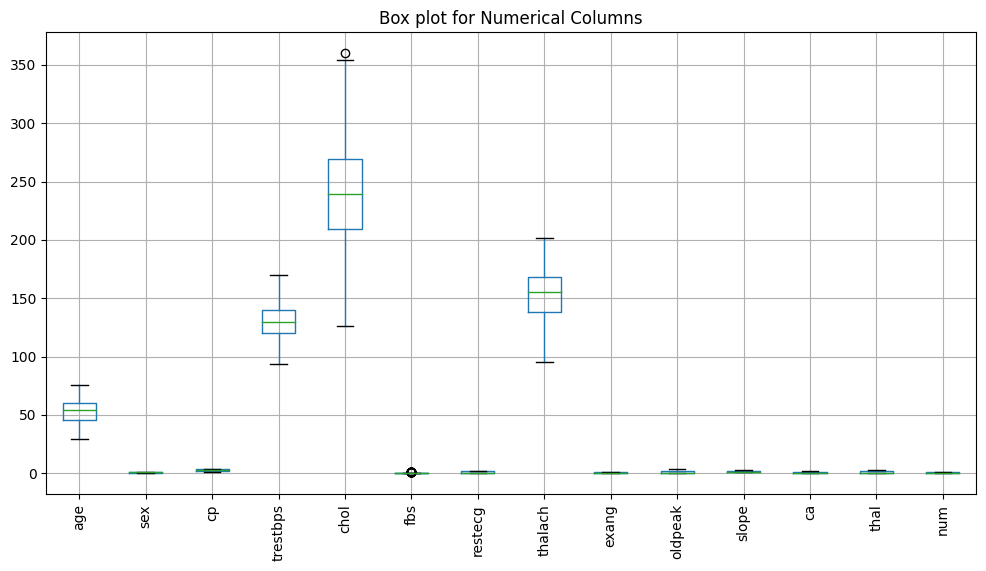

In [548]:
import matplotlib.pyplot as plt

# Create a box plot for numerical columns
dataset.boxplot(figsize=(12, 6))
plt.xticks(rotation=90)
plt.title('Box plot for Numerical Columns')
plt.show()

In [549]:
dataset.shape

(262, 14)

In [550]:
dataset['thal'].value_counts()

thal
0    152
2     93
1     15
3      2
Name: count, dtype: int64

In [551]:
dataset = pd.read_csv('HealthData.csv')
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:, 13].values

In [552]:
imputer = SimpleImputer(missing_values= np.NAN, strategy= 'mean', fill_value=None,copy=True)
imputer=imputer.fit(X[:,11:13])
X[:,11:13]=imputer.transform(X[:,11:13])


In [553]:
unique_values = np.unique(X[:, 12])
print("Unique values after imputation in 13th column:", unique_values)

Unique values after imputation in 13th column: [3.         4.73421927 6.         7.        ]


In [554]:
unique_values, counts = np.unique(X[:, 12], return_counts=True)

print("Unique values and their counts:")
for value, count in zip(unique_values, counts):
    print(f"{value}: {count}")

Unique values and their counts:
3.0: 166
4.73421926910299: 2
6.0: 18
7.0: 117


In [555]:
nan_count = np.count_nonzero(np.isnan(X[:, 11:13]))
print("Number of NaN values:", nan_count)

Number of NaN values: 0


In [556]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

In [557]:
sc = StandardScaler()
# file_name='scaler.pkl'
# joblib.dump(sc,file_name)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
file_name='scaler.joblib'
joblib.dump(sc,file_name)

# sc = StandardScaler()
# # train=list(X_train)
# X_train = sc.fit_transform(X_train)

# # Save it
# scaler_file = "standard_scalar_decision.pkl"
# joblib.dump(sc, scaler_file)
# X_test = sc.transform(X_test)

['scaler.joblib']

num
0    164
1    139
Name: count, dtype: int64

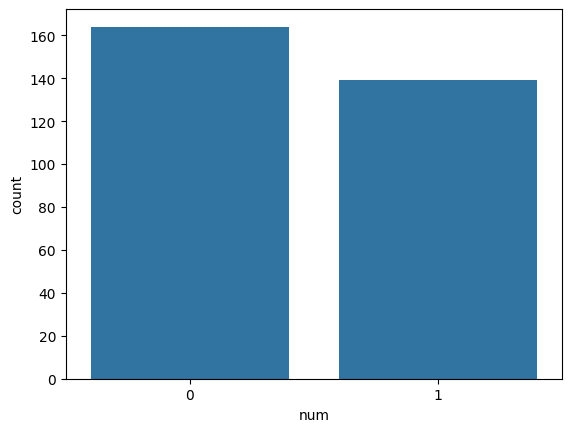

In [558]:
sn.countplot(x='num',data=dataset)
dataset.num.value_counts()

## DECISION TREE MODEL

In [559]:
from sklearn.model_selection import GridSearchCV
# from sklearn.tree import DecisionTreeClassifier

# Define the grid of parameters to search over
param_grid = {
    "max_depth": [3, 5, 7, 10],
    "splitter": ["best", "random"],
    "criterion": ["entropy", "gini"]
}

# Instantiate the DecisionTreeClassifier with your desired random state
model = DecisionTreeClassifier(random_state=0)

# Create the GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring="accuracy")

# Fit the grid search to your training data
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters:", best_params)
print("Best score:", best_score)

# Access the results of the grid search
grid_results = grid_search.cv_results_

# Print the results (optional)
print(grid_results)

# Use the best parameters to train a new model on the entire training data
best_model = DecisionTreeClassifier(**best_params)
best_model.fit(X_train, y_train)

# You can now use the best model for prediction or further analysis


Best parameters: {'criterion': 'entropy', 'max_depth': 7, 'splitter': 'random'}
Best score: 0.755052790346908
{'mean_fit_time': array([0.00195737, 0.00097189, 0.00207949, 0.00152764, 0.0017745 ,
       0.00117106, 0.00168958, 0.00117011, 0.00126324, 0.00109048,
       0.00163341, 0.00119934, 0.00149498, 0.00113091, 0.00162997,
       0.00088434]), 'std_fit_time': array([7.02727709e-04, 4.18601108e-05, 7.41523009e-04, 6.67400433e-04,
       3.29007390e-04, 1.62455656e-04, 1.97341038e-04, 1.22552382e-04,
       9.30399111e-05, 1.88401638e-04, 4.84390891e-04, 3.75795652e-04,
       5.29359263e-05, 1.13858949e-04, 4.57557855e-04, 2.35952016e-05]), 'mean_score_time': array([0.00085607, 0.00068541, 0.00154595, 0.00068669, 0.00094657,
       0.00085454, 0.00078163, 0.00103188, 0.00087333, 0.00088158,
       0.00108356, 0.00103726, 0.00074449, 0.00076284, 0.00061927,
       0.0005558 ]), 'std_score_time': array([8.96613127e-05, 6.24085668e-05, 6.62672754e-04, 4.58213962e-05,
       2.84077409e

DecisionTreeClassifier(criterion='entropy', max_depth=7, splitter='random')

In [560]:
classifier = DecisionTreeClassifier(splitter="random", max_depth=5,criterion = 'entropy', random_state =0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0,
                       splitter='random')

In [561]:
k_fold = KFold(n_splits=5, shuffle=True)

# Perform cross-validation on the training set
cv_scores = cross_val_score(classifier, X_train, y_train, cv=k_fold, scoring='accuracy')

# Display the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

Cross-Validation Scores: [0.76923077 0.76923077 0.74509804 0.74509804 0.82352941]
Mean CV Accuracy: 0.7704374057315233


In [562]:
filename ='decision_tree_model.joblib'
scaler=joblib.dump(classifier,filename)

In [563]:
!pip freeze

aiofiles==23.2.1
aiohttp==3.9.0
aiosignal==1.3.1
aiostream==0.5.2
altair==5.2.0
annotated-types==0.6.0
anyio==3.7.1
appdirs==1.4.3
apturl==0.5.2
asgiref==3.7.2
asttokens==2.4.1
async-timeout==4.0.3
attrs==23.1.0
backcall==0.2.0
backoff==2.2.1
backports.zoneinfo==0.2.1
bcrypt==4.1.1
beautifulsoup4==4.12.2
blinker==1.7.0
Brlapi==0.7.0
cachetools==5.3.2
certifi==2023.11.17
chardet==5.2.0
charset-normalizer==3.3.2
chroma-hnswlib==0.7.3
chromadb==0.4.18
click==8.1.7
colorama==0.4.6
coloredlogs==15.0.1
comm==0.2.0
command-not-found==0.3
contourpy==1.1.1
cryptography==2.8
cupshelpers==1.0
cycler==0.12.1
dataclasses-json==0.6.2
dbus-python==1.2.16
debugpy==1.8.0
decorator==5.1.1
defer==1.0.6
Deprecated==1.2.14
distlib==0.3.7
distro==1.8.0
distro-info==0.23+ubuntu1.1
dnspython==2.4.2
duplicity==0.8.12.0
emoji==2.8.0
entrypoints==0.3
exceptiongroup==1.2.0
executing==2.0.1
fastapi==0.104.1
fasteners==0.14.1
ffmpy==0.3.1
filelock==3.13.1
filetype==1.2.0
flatbuffers==23.5.26
fonttools==4.46.0
froze

In [564]:
y_pred = classifier.predict(X_test)

In [565]:
accuracy_score(y_test,y_pred)

0.8695652173913043

In [566]:
cm=confusion_matrix(y_test, y_pred)
cm

array([[19,  2],
       [ 4, 21]])

In [567]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.83      0.90      0.86        21
           1       0.91      0.84      0.87        25

    accuracy                           0.87        46
   macro avg       0.87      0.87      0.87        46
weighted avg       0.87      0.87      0.87        46



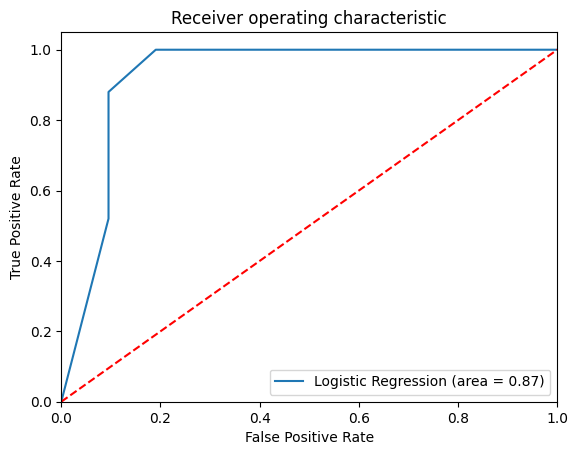

In [568]:
logit_roc_auc = roc_auc_score(y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [569]:
Newdataset = pd.read_csv('newdata.csv')
Newdataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,65,1,0,145,233,1,2,150,1,2.3,3,0,7


In [570]:
classifier = joblib.load('decision_tree_model.pkl')

In [571]:
Newdataset = pd.read_csv('newdata.csv')
Newdataset_scaled = sc.transform(Newdataset)

/home/ongraph/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


0,1,1,0,0,0,1,0,1

In [572]:
ynew=classifier.predict(Newdataset_scaled)
ynew

array([1])

## LOGISTIC MODEL

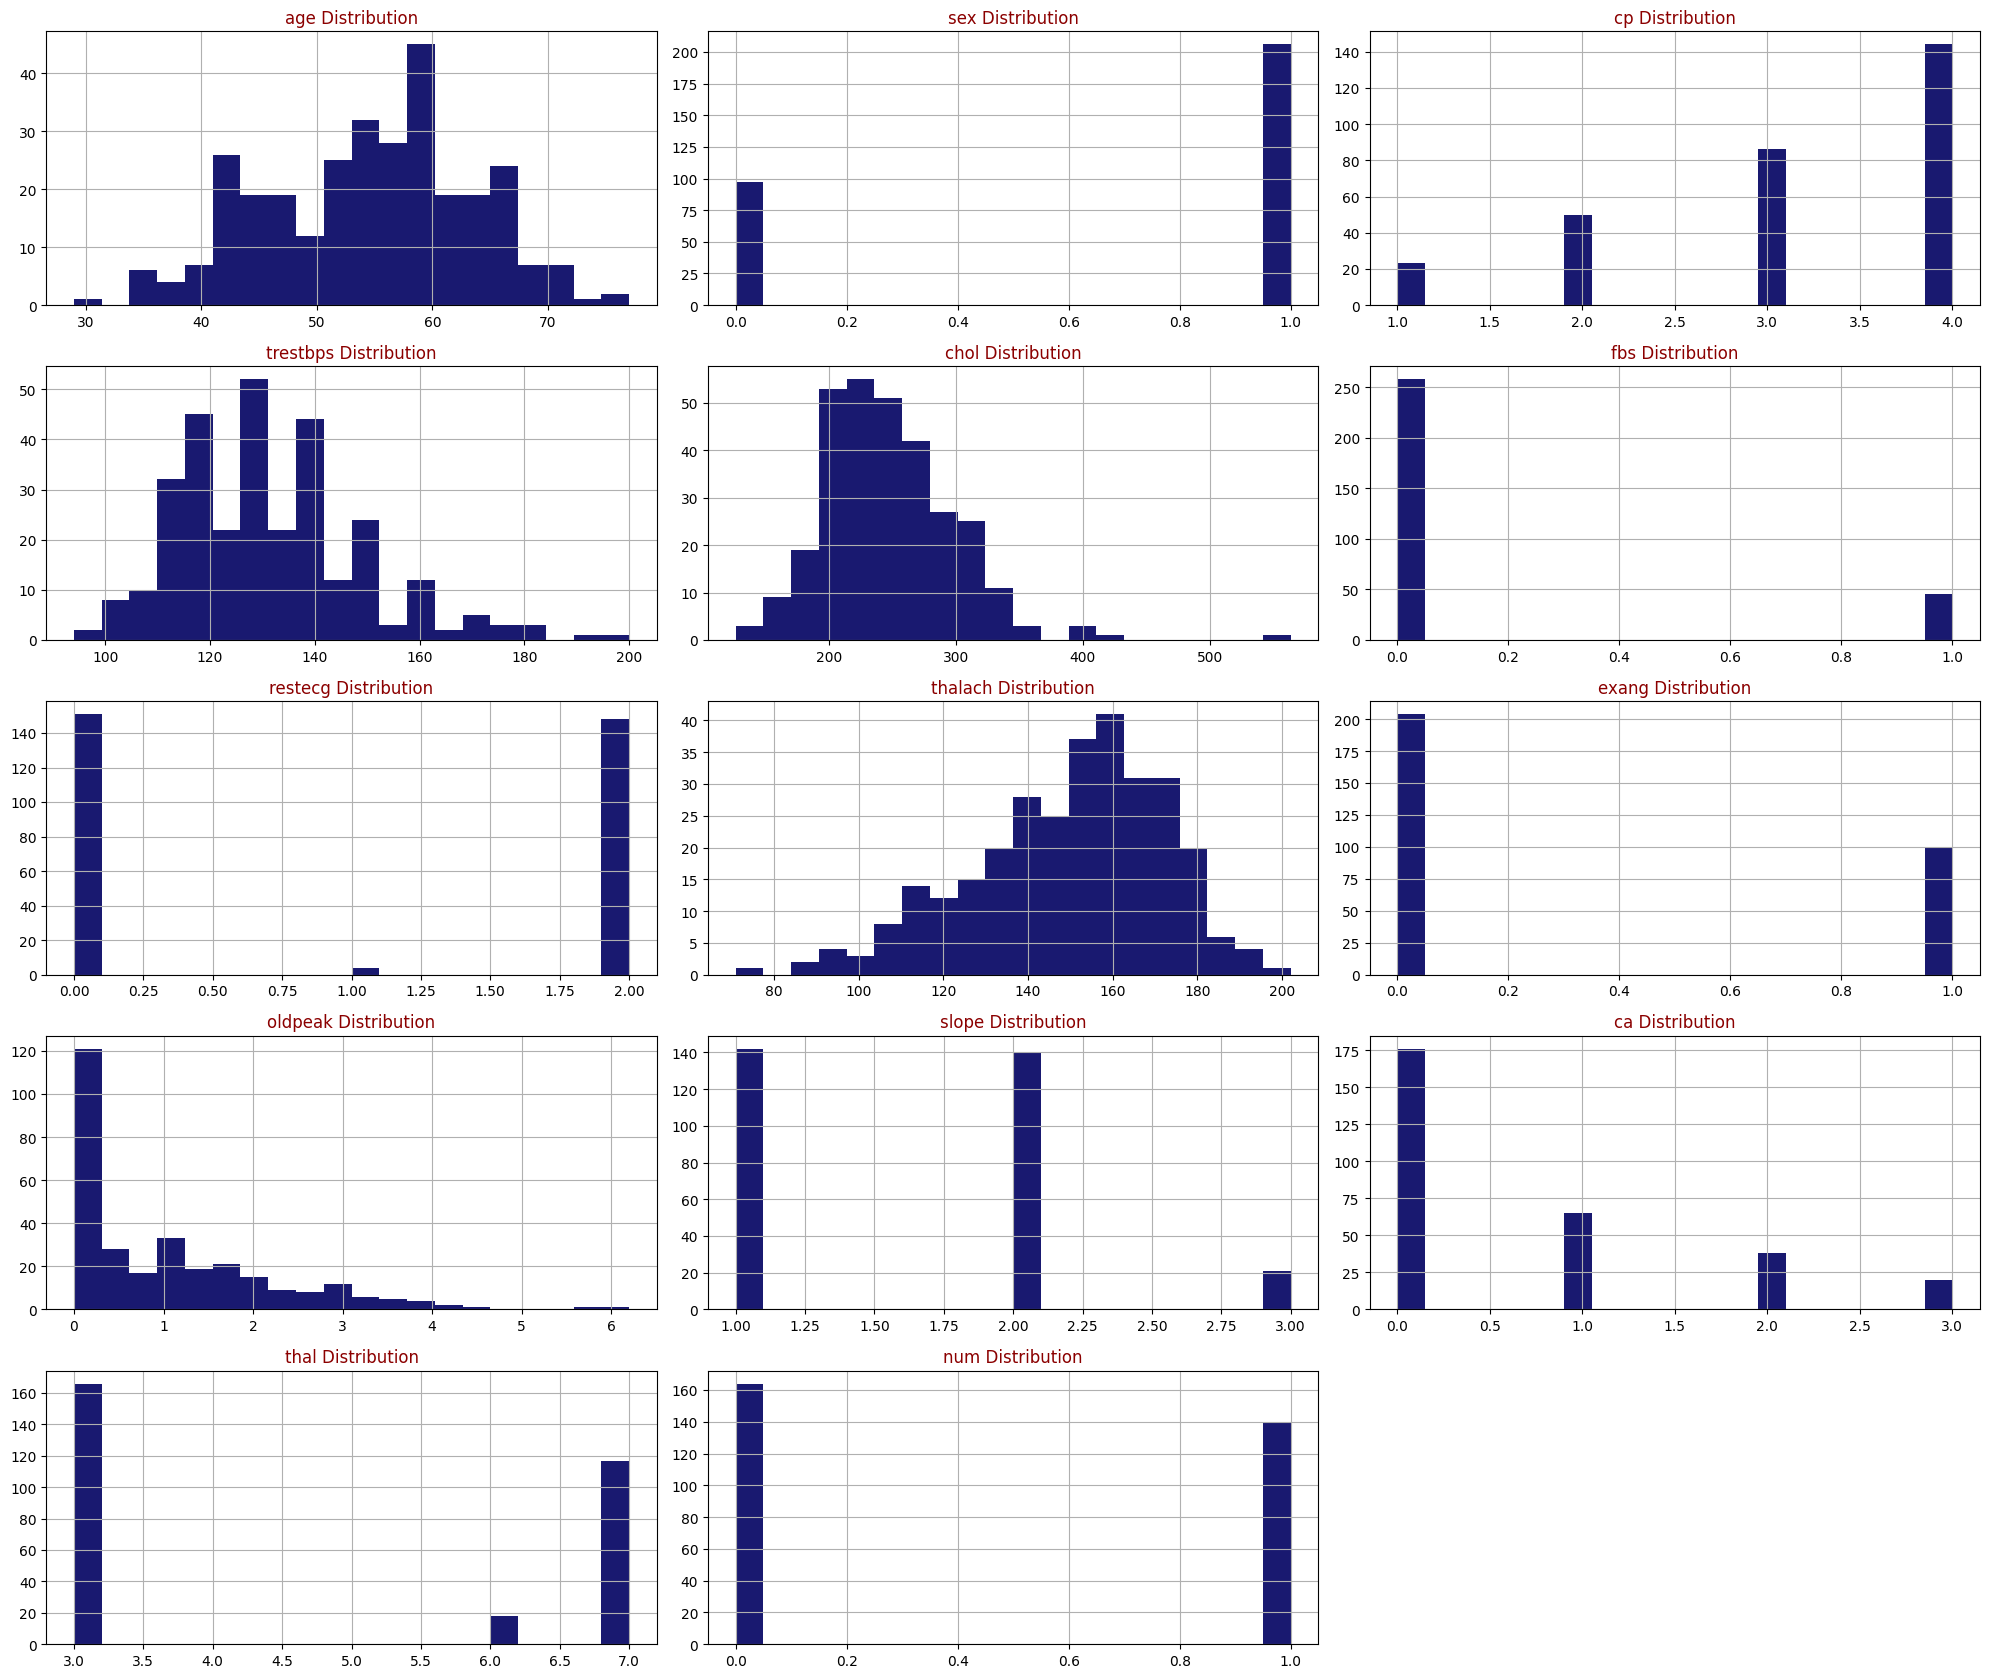

In [573]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')

    fig.tight_layout()
    plt.show()
draw_histograms(dataset,dataset.columns,6,3)

In [574]:
# pd.crosstab(dataset.thal,dataset.num).plot(kind='bar')
# plt.title('bar chart for thal vs num')
# plt.xlabel('thal')
# plt.ylabel('num')

# pd.crosstab(dataset.trestbps,dataset.num).plot(kind='bar')
# plt.title('bar chart for trestbps vs num')
# plt.xlabel('trestbps')
# plt.ylabel('num')

# pd.crosstab(dataset.cp,dataset.num).plot(kind='bar')
# plt.title('bar chart for cp vs num')
# plt.xlabel('cp')
# plt.ylabel('num')

# pd.crosstab(dataset.chol,dataset.num).plot(kind='bar')
# plt.title('bar chart for chol vs num')
# plt.xlabel('chol')
# plt.ylabel('num')

# pd.crosstab(dataset.restecg,dataset.num).plot(kind='bar')
# plt.title('bar chart for restecg vs num')
# plt.xlabel('restecg')
# plt.ylabel('num')

In [575]:
from sklearn.model_selection import GridSearchCV

model = LogisticRegression(random_state=0)

param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    "solver": ["lbfgs", "sgd", "liblinear"],
    "C": [0.001, 0.01, 0.1, 1, 10],
    "max_iter": [100, 200, 500],
    "class_weight": ["balanced", None]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring="accuracy")

grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters:", best_params)
print("Best score:", best_score)

# Access the results of the grid search
grid_results = grid_search.cv_results_

# Print the results (optional)
print(grid_results)

# Use the best parameters to train a new model on the entire training data
best_model = LogisticRegression(**best_params)
best_model.fit(X_train, y_train)


Best parameters: {'C': 0.01, 'class_weight': None, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Best score: 0.8443438914027149
{'mean_fit_time': array([0.00030155, 0.00031066, 0.00142655, 0.00404115, 0.00017605,
       0.00198359, 0.00023451, 0.00027356, 0.00026269, 0.00024552,
       0.00017295, 0.00158095, 0.00293307, 0.00016747, 0.00129142,
       0.00019369, 0.0001595 , 0.00019608, 0.00019035, 0.00021114,
       0.0011137 , 0.00261798, 0.00015578, 0.00136437, 0.00018697,
       0.00015621, 0.00020561, 0.00026855, 0.00018039, 0.00086045,
       0.00229402, 0.00018492, 0.00102987, 0.00018687, 0.00016289,
       0.00021138, 0.00028806, 0.00016217, 0.00082192, 0.00234799,
       0.00017786, 0.00112624, 0.00019507, 0.00016646, 0.00027766,
       0.000212  , 0.00018849, 0.00105815, 0.00269537, 0.00019679,
       0.00084968, 0.00019059, 0.00021124, 0.00022297, 0.00018415,
       0.0001615 , 0.00124979, 0.00259619, 0.00017033, 0.00127029,
       0.00022845, 0.00015836, 0.00018377, 

/home/ongraph/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
900 fits failed out of a total of 1350.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "/home/ongraph/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ongraph/.local/lib/python3.8/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/home/ongraph/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1169, in fit
    solver = _check_solver(self.solv

LogisticRegression(C=0.01)

In [576]:
logistic_classifier =LogisticRegression(C=0.01,penalty='l2',max_iter=100, solver='liblinear')
logistic_classifier.fit(X_train, y_train)

LogisticRegression(C=0.01, solver='liblinear')

In [577]:
k_fold = KFold(n_splits=5, shuffle=True)

# Perform cross-validation on the training set
cv_scores = cross_val_score(logistic_classifier, X_train, y_train, cv=k_fold, scoring='accuracy')

# Display the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

Cross-Validation Scores: [0.80769231 0.86538462 0.76470588 0.90196078 0.82352941]
Mean CV Accuracy: 0.8326546003016592


In [578]:
filename = 'Logistic_regression_model.joblib'
joblib.dump(logistic_classifier,filename)

['Logistic_regression_model.joblib']

In [579]:
y_Class_pred=logistic_classifier.predict(X_test)


In [580]:
accuracy_score(y_test,y_Class_pred)


0.8695652173913043

In [581]:
cm = confusion_matrix(y_test, y_Class_pred)
cm

array([[18,  3],
       [ 3, 22]])

In [582]:
print(classification_report(y_test, y_Class_pred))


              precision    recall  f1-score   support

           0       0.86      0.86      0.86        21
           1       0.88      0.88      0.88        25

    accuracy                           0.87        46
   macro avg       0.87      0.87      0.87        46
weighted avg       0.87      0.87      0.87        46



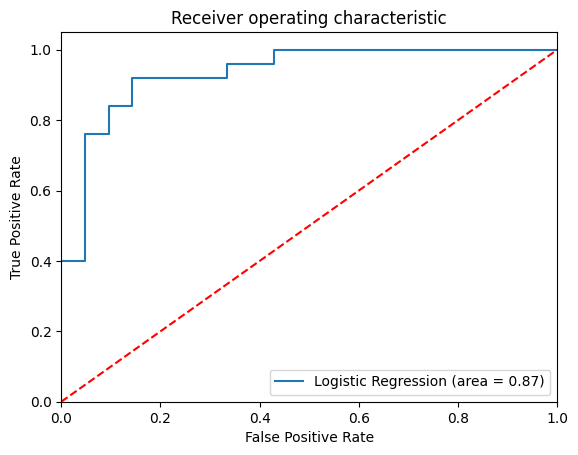

In [583]:
logit_roc_auc = roc_auc_score(y_test, logistic_classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logistic_classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


In [584]:
Logistic_Newdataset = pd.read_csv('newdata.csv')
Logistic_Newdataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,65,1,0,145,233,1,2,150,1,2.3,3,0,7


In [585]:
logistic_classifier = joblib.load('Logistic_regression_model.pkl')


In [586]:
logistic_Newdataset_scaled = sc.transform(Logistic_Newdataset)


/home/ongraph/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [587]:
logistic_ynew=logistic_classifier.predict(logistic_Newdataset_scaled)
logistic_ynew

array([1])

0,1,1,0,0,0,1,0,1  good prediction in logistic only 1 is incorrect

## KNN MODEL

In [588]:
# KNN_classifier = KNeighborsClassifier(n_neighbors=3)
# KNN_classifier.fit(X_train, y_train)

In [589]:
from sklearn.model_selection import GridSearchCV

# Define KNN model with initial parameter values
model = KNeighborsClassifier(n_neighbors=5)

# Define parameter grid for tuning
param_grid = {
    "n_neighbors": [3, 5, 7, 10],
    "weights": ["uniform", "distance"],
    "algorithm": ["brute", "kd_tree", "ball_tree"],
    "leaf_size": [15, 20, 30]
}

# Create GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring="accuracy")

# Fit the grid search to your training data
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best KNN parameters:", best_params)
print("Best score:", best_score)

# Access the results of the grid search (optional)
grid_results = grid_search.cv_results_

# Use the best parameters to train a new KNN model
best_model = KNeighborsClassifier(**best_params)
best_model.fit(X_train, y_train)

# You can now use the best_model for prediction or further analysis


Best KNN parameters: {'algorithm': 'brute', 'leaf_size': 15, 'n_neighbors': 10, 'weights': 'uniform'}
Best score: 0.8169683257918552


KNeighborsClassifier(algorithm='brute', leaf_size=15, n_neighbors=10)

In [590]:
KNN_classifier = KNeighborsClassifier(n_neighbors=5)
KNN_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [591]:
filename ='KNN_model.joblib'
joblib.dump(KNN_classifier,filename)

['KNN_model.joblib']

In [592]:
y_pred = KNN_classifier.predict(X_test)


In [593]:
accuracy_score(y_test,y_pred)

0.9130434782608695

In [594]:
cm = confusion_matrix(y_test, y_pred)


In [595]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.90      0.90      0.90        21
           1       0.92      0.92      0.92        25

    accuracy                           0.91        46
   macro avg       0.91      0.91      0.91        46
weighted avg       0.91      0.91      0.91        46



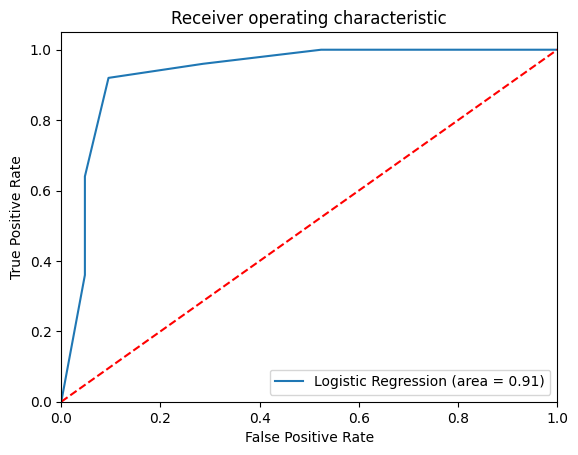

In [596]:
logit_roc_auc = roc_auc_score(y_test, KNN_classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, KNN_classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


In [597]:
KNN_Newdataset = pd.read_csv('newdata.csv')
KNN_Newdataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,65,1,0,145,233,1,2,150,1,2.3,3,0,7


In [598]:
KNN_classifier = joblib.load('KNN_model.pkl')


In [599]:
KNN_Newdataset_scaled = sc.transform(KNN_Newdataset)


/home/ongraph/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [600]:
KNN_ynew=KNN_classifier.predict(KNN_Newdataset_scaled)
KNN_ynew

array([1])

In [601]:
0,1,1,0,0,0,1,0,1

(0, 1, 1, 0, 0, 0, 1, 0, 1)

## NAIVE BAYES MODEL

In [602]:
NB_classifier = GaussianNB()
NB_classifier.fit(X_train, y_train)

GaussianNB()

In [603]:
filename = 'naive_bayes_model.joblib'
joblib.dump(NB_classifier,filename)

['naive_bayes_model.joblib']

In [604]:
y_pred = NB_classifier.predict(X_test)


In [605]:
accuracy_score(y_test,y_pred)


0.8043478260869565

In [606]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[18,  3],
       [ 6, 19]])

In [607]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.75      0.86      0.80        21
           1       0.86      0.76      0.81        25

    accuracy                           0.80        46
   macro avg       0.81      0.81      0.80        46
weighted avg       0.81      0.80      0.80        46



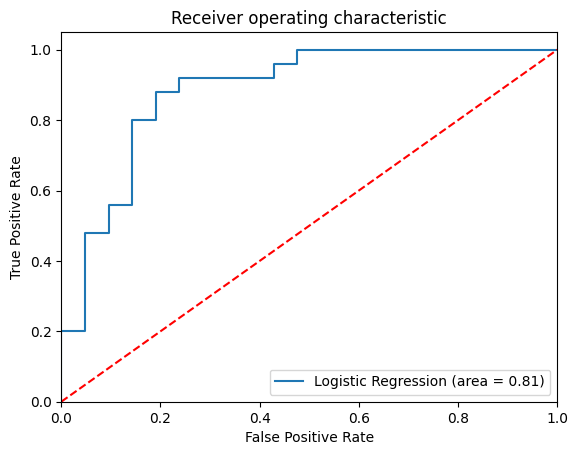

In [608]:
logit_roc_auc = roc_auc_score(y_test, NB_classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, NB_classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [609]:
NB_Newdataset = pd.read_csv('newdata.csv')
NB_Newdataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,65,1,0,145,233,1,2,150,1,2.3,3,0,7


In [610]:
NB_classifier = joblib.load('naive_bayes_model.pkl')


In [611]:
NB_Newdataset_scaled = sc.transform(NB_Newdataset)


/home/ongraph/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [612]:
NB_ynew=NB_classifier.predict(NB_Newdataset_scaled)
NB_ynew

array([1])

## SVC MODEL

In [613]:
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(X_train, y_train)
    svc_scores.append(svc_classifier.score(X_test, y_test))
    # print(svc_scores)

Text(0.5, 1.0, 'Support Vector Classifier scores for different kernels')

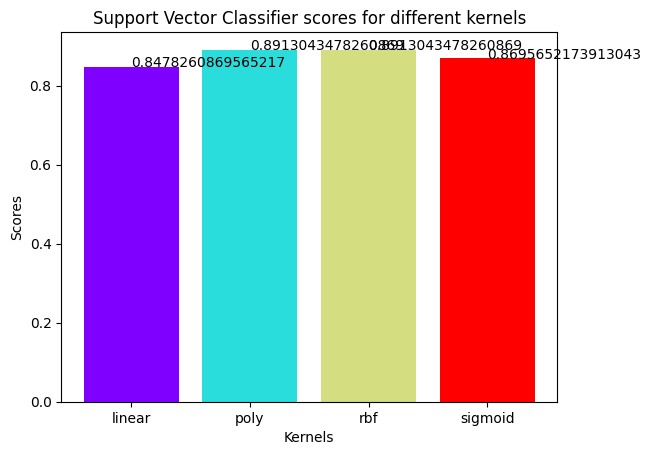

In [614]:
colors = rainbow(np.linspace(0, 1, len(kernels)))
plt.bar(kernels, svc_scores, color = colors)
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], svc_scores[i])
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')

In [615]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define SVC model with initial parameter values
model = SVC(kernel="linear", C=1.0)  # Adjust kernel and C as needed

# Define parameter grid for tuning
param_grid = {
    "C": [0.01, 0.1, 1.0, 10.0],  # Regularization parameter
    "kernel": ["linear", "rbf", "poly"],  # Kernel type
    "degree": [2, 3],  # Degree of polynomial kernel (only relevant for "poly" kernel)
}

# Create GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring="accuracy")

# Fit the grid search to your training data
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best SVC parameters:", best_params)
print("Best score:", best_score)

# Access the results of the grid search (optional)
grid_results = grid_search.cv_results_

# Use the best parameters to train a new SVC model
best_model = SVC(**best_params)
best_model.fit(X_train, y_train)

# Predict using the best model
predictions = best_model.predict(X_test)


Best SVC parameters: {'C': 0.1, 'degree': 2, 'kernel': 'rbf'}
Best score: 0.836500754147813


In [616]:
SVC_classifier = SVC(kernel = 'poly' ,probability=True)
SVC_classifier.fit(X_train, y_train)

SVC(kernel='poly', probability=True)

In [617]:
k_fold = KFold(n_splits=5, shuffle=True)

# Perform cross-validation on the training set
cv_scores = cross_val_score(SVC_classifier, X_train, y_train, cv=k_fold, scoring='accuracy')

# Display the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

Cross-Validation Scores: [0.76923077 0.73076923 0.90196078 0.82352941 0.78431373]
Mean CV Accuracy: 0.8019607843137255


In [618]:
filename = 'svc_model.joblib'
joblib.dump(SVC_classifier,filename)

['svc_model.joblib']

In [619]:
y_pred = SVC_classifier.predict(X_test)


In [620]:
accuracy_score(y_test,y_pred)


0.8913043478260869

In [621]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[20,  1],
       [ 4, 21]])

In [622]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.83      0.95      0.89        21
           1       0.95      0.84      0.89        25

    accuracy                           0.89        46
   macro avg       0.89      0.90      0.89        46
weighted avg       0.90      0.89      0.89        46



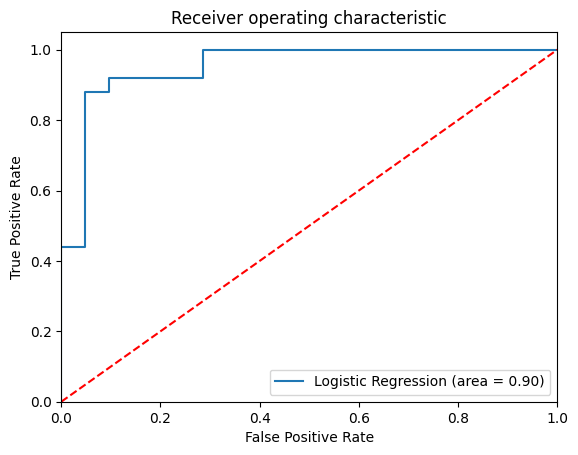

In [623]:
logit_roc_auc = roc_auc_score(y_test, SVC_classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, SVC_classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [624]:
SVC_Newdataset = pd.read_csv('newdata.csv')
SVC_Newdataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,65,1,0,145,233,1,2,150,1,2.3,3,0,7


In [625]:
SVC_classifier = joblib.load('svc_model.pkl')


In [626]:
SVC_Newdataset = pd.read_csv('newdata.csv')
SVC_Newdataset_scaled = sc.transform(SVC_Newdataset)

/home/ongraph/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [627]:
SVC_ynew=SVC_classifier.predict(SVC_Newdataset_scaled)
SVC_ynew


array([0])

## DEEP LEARNING MODEL

In [628]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.neural_network import MLPRegressor

# # Define MLPRegressor model with initial parameter values
# model = MLPRegressor(hidden_layer_sizes=(100,), activation="relu", solver="adam", 
#                      alpha=0.001, random_state=0)  # Adjust parameters as needed

# # Define parameter grid for tuning
# param_grid = {
#     "hidden_layer_sizes": [(10, 50), (50, 100), (100, 200)],  # Different hidden layer configurations
#     "activation": ["relu", "tanh"],  # Activation functions
#     "solver": ["adam", "lbfgs"],  # Optimization algorithms
#     "alpha": [0.0001, 0.001, 0.01],  # Regularization parameter
# }

# # Create GridSearchCV object
# grid_search = GridSearchCV(model, param_grid, cv=5, scoring="r2")  # Choose appropriate scoring metric

# # Fit the grid search to your training data
# grid_search.fit(X_train, y_train)

# # Get the best parameters and score
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# print("Best MLPRegressor parameters:", best_params)
# print("Best score:", best_score)

# # Access the results of the grid search (optional)
# grid_results = grid_search.cv_results_

# # Use the best parameters to train a new MLPRegressor model
# best_model = MLPRegressor(**best_params)
# best_model.fit(X_train, y_train)

# # Predict using the best model
# predictions = best_model.predict(X_test)


In [629]:
DL_classifier = MLPClassifier(hidden_layer_sizes=(8,8,8),activation='relu',solver='adam',max_iter=500)
DL_classifier.fit(X_train, y_train)

/home/ongraph/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(8, 8, 8), max_iter=500)

In [630]:
filename ='deep_learning_model.joblib'
joblib.dump(DL_classifier,filename)

['deep_learning_model.joblib']

In [631]:
y_pred = DL_classifier.predict(X_test)


In [632]:
accuracy_score(y_test,y_pred)


0.8260869565217391

In [633]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[18,  3],
       [ 5, 20]])

In [634]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.78      0.86      0.82        21
           1       0.87      0.80      0.83        25

    accuracy                           0.83        46
   macro avg       0.83      0.83      0.83        46
weighted avg       0.83      0.83      0.83        46



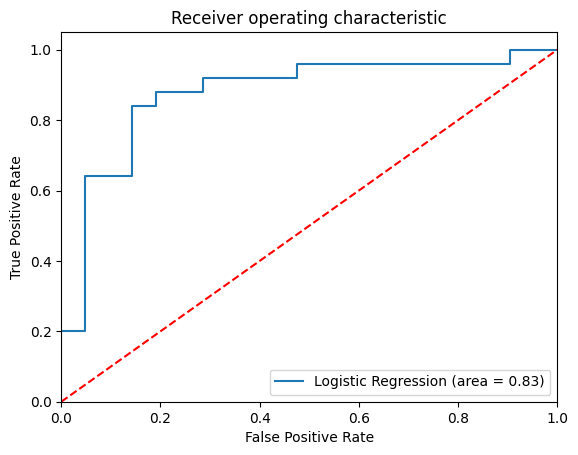

In [635]:
logit_roc_auc = roc_auc_score(y_test, DL_classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, DL_classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


In [636]:
DL_Newdataset = pd.read_csv('newdata.csv')
DL_Newdataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,65,1,0,145,233,1,2,150,1,2.3,3,0,7


In [637]:
DL_classifier = joblib.load('deep_learning_model.pkl')


In [638]:
DL_Newdataset_scaled = sc.transform(DL_Newdataset)


/home/ongraph/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [639]:
DL_ynew=DL_classifier.predict(DL_Newdataset_scaled)
DL_ynew

array([0])

In [647]:
classifier = joblib.load('decision_tree_model.joblib')
logistic_classifier = joblib.load('Logistic_regression_model.joblib')
KNN_classifier = joblib.load('KNN_model.joblib')
NB_classifier = joblib.load('naive_bayes_model.joblib')
SVC_classifier = joblib.load('svc_model.joblib')
DL_classifier = joblib.load('deep_learning_model.joblib')
scal=joblib.load('scaler.joblib')

In [648]:

Newdataset_scaled = scal.transform(Newdataset)
logistic_Newdataset_scaled = scal.transform(Logistic_Newdataset)
KNN_Newdataset_scaled = scal.transform(KNN_Newdataset)
NB_Newdataset_scaled = scal.transform(NB_Newdataset)
SVC_Newdataset_scaled = scal.transform(SVC_Newdataset)
DL_Newdataset_scaled = scal.transform(DL_Newdataset)


/home/ongraph/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/home/ongraph/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/home/ongraph/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/home/ongraph/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/home/ongraph/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/home/ongraph/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but StandardScaler was fitted w

In [649]:
predictions_decision_tree = classifier.predict(Newdataset_scaled)
predictions_logistic = logistic_classifier.predict(logistic_Newdataset_scaled)
predictions_KNN = KNN_classifier.predict(KNN_Newdataset_scaled)
predictions_NB = NB_classifier.predict(NB_Newdataset_scaled)
predictions_SVC = SVC_classifier.predict(SVC_Newdataset_scaled)
predictions_DL = DL_classifier.predict(DL_Newdataset_scaled)

In [650]:
print(predictions_decision_tree)
print(predictions_logistic)
print(predictions_KNN)
print(predictions_NB)
print(predictions_SVC) 
print(predictions_DL) 

[1]
[1]
[1]
[1]
[0]
[0]


: 